In [169]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances, paired_euclidean_distances
from sklearn.datasets import load_iris

In [170]:
def k_means(X: np.array, k: int=2, tol: float=0.001, max_iter: int=10):
    """
    K-means algorithm
    
    :Х: Training sample (2-D array)
    :k: Number of clusters
    :tol: Convergence criteria (minimal centroids shift)
    :max_iter: Maximum number of iterations
    """
    try:
        n,m=X.shape
    except ValueError:
        print('Dataset must be 2-D array(n-samples, m-features)')
    # Centroids random initialize        
    centroids_coords_curr = X[np.random.randint(0,n,size=k)]
    # Set centroids shift for the first step
    centroids_shift = np.full(k, 10)                         
    step = 1
    while (any(centroids_shift > tol)) & (step <= max_iter):
        # Set previous centroids coords
        centroids_coords_prev = centroids_coords_curr.copy()
        # Calculate cluster labels
        cluster_labels = euclidean_distances(X,centroids_coords_curr).argmin(axis=1)
        # Calculate centroids coords
        centroids_coords_curr = [X[cluster_labels==i].mean(axis=0) for i in range(k)]
        # Calulate centroids shift
        centroids_shift = paired_euclidean_distances(centroids_coords_prev, centroids_coords_curr)
        print(f'Step: {step}, Centroids shift: {centroids_shift}')
        step += 1
    return np.vstack(centroids_coords_curr), cluster_labels

Step: 1, Centroids shift: [0.36724543 0.38242646 1.15795827]
Step: 2, Centroids shift: [0.14735858 0.28829482 0.15001234]
Step: 3, Centroids shift: [0.03591909 0.32664151 0.12215232]
Step: 4, Centroids shift: [0.         0.15841717 0.06947902]
Step: 5, Centroids shift: [0.06825541 0.12933333 0.11611827]
Step: 6, Centroids shift: [0.         0.13375166 0.08465054]
Step: 7, Centroids shift: [0.         0.06594018 0.0469512 ]
Step: 8, Centroids shift: [0.         0.02292417 0.01666554]
Step: 9, Centroids shift: [0.         0.0197593  0.01398753]
Step: 10, Centroids shift: [0. 0. 0.]


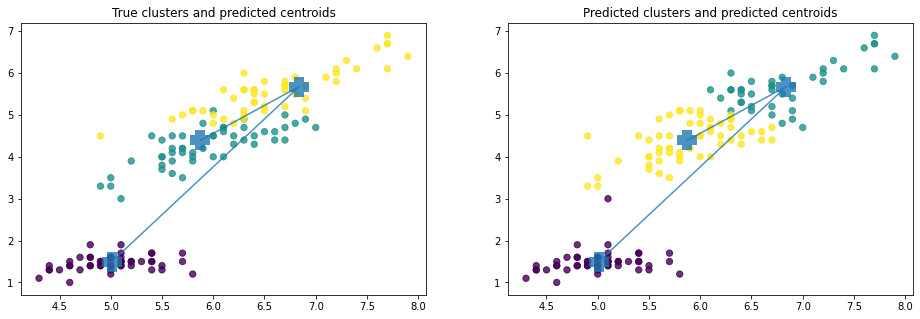

In [173]:
# Dataset loading
iris_data = load_iris()
x = iris_data.data[:,[0,2]]
y = iris_data.target

# Model training
coords, labels = k_means(x,k=3)

# Visualisation
words = ['True', 'Predicted']
fig, ax = plt.subplots(1,2, figsize=(16,5))

for i, j in enumerate([y,labels]):
    ax[i].scatter(x[:,0], x[:,1], s=40, c=j, marker='o', alpha=0.8)
    ax[i].plot(cent[:,0], cent[:,1], marker='+', mew=10, ms=20, alpha=0.8)
    ax[i].set_title(f'{words[i]} clusters and predicted centroids')
plt.show()